In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
business = pd.read_csv("D:/yelp/yelp_business.csv") 

In [4]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
business.isna().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [6]:
business.dtypes

business_id      object
name             object
neighborhood     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

In [7]:
business['business_id'].head()

0    FYWN1wneV18bWNgQjJ2GNg
1    He-G7vWjzVUysIKrfNbPUQ
2    KQPW8lFf1y5BT2MxiSZ3QA
3    8DShNS-LuFqpEWIp0HxijA
4    PfOCPjBrlQAnz__NXj9h_w
Name: business_id, dtype: object

In [8]:
business.nunique()

business_id     174567
name            132619
neighborhood       408
address         138564
city              1093
state               67
postal_code      16004
latitude        138432
longitude       138844
stars                9
review_count      1061
is_open              2
categories       76419
dtype: int64

In [9]:
business['name'].head()

0            "Dental by Design"
1         "Stephen Szabo Salon"
2       "Western Motor Vehicle"
3            "Sports Authority"
4    "Brick House Tavern + Tap"
Name: name, dtype: object

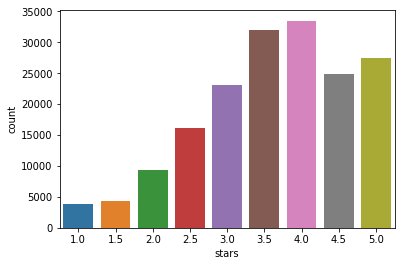

In [10]:
sns.countplot(x='stars',data=business);

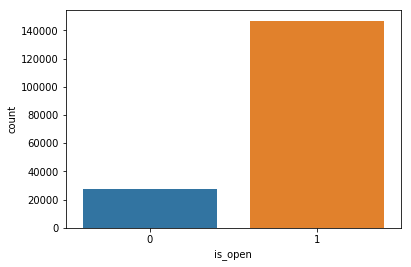

In [11]:
sns.countplot(x='is_open',data=business);

C:\Users\patel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


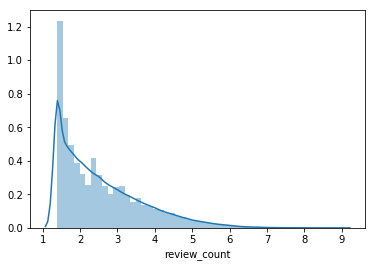

In [12]:
sns.distplot((business['review_count']).apply(np.log1p));

In [13]:
categories = ';'.join(business['categories'])

In [14]:
new_column = pd.DataFrame(categories.split(';'),columns=['category'])

In [15]:
new_column.head()

,category
0,Dentists
1,General Dentistry
2,Health & Medical
3,Oral Surgeons
4,Cosmetic Dentists


In [16]:
new_column.nunique()

category    1294
dtype: int64

In [17]:
cat_count =pd.DataFrame(new_column.category.value_counts(),columns=['category'])
cat_count.reset_index(inplace= True)


In [18]:
cat_count.head()

,index,category
0,Restaurants,54618
1,Shopping,27971
2,Food,24777
3,Beauty & Spas,17014
4,Home Services,16205


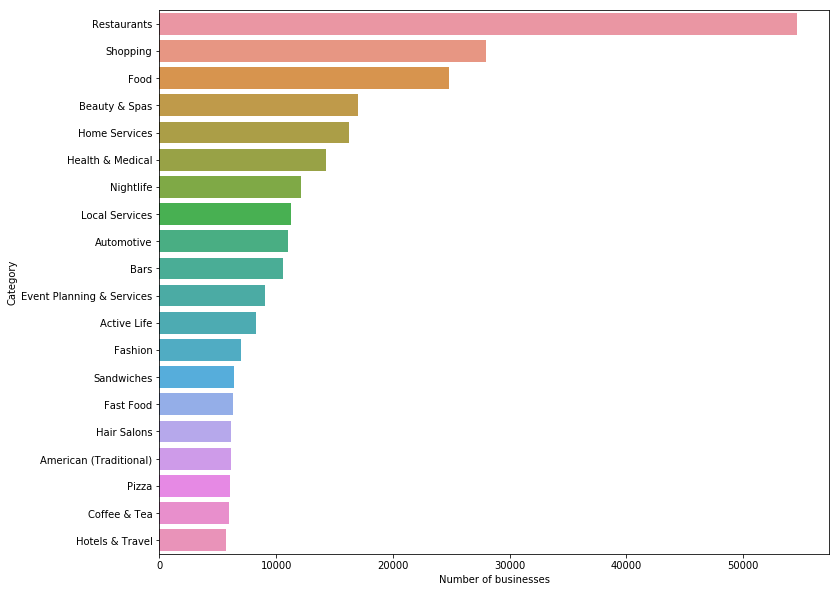

In [19]:
plt.figure(figsize=(12,10))
f = sns.barplot( y= 'index', x = 'category' , data = cat_count.iloc[0:20])
f.set_ylabel('Category')
f.set_xlabel('Number of businesses');

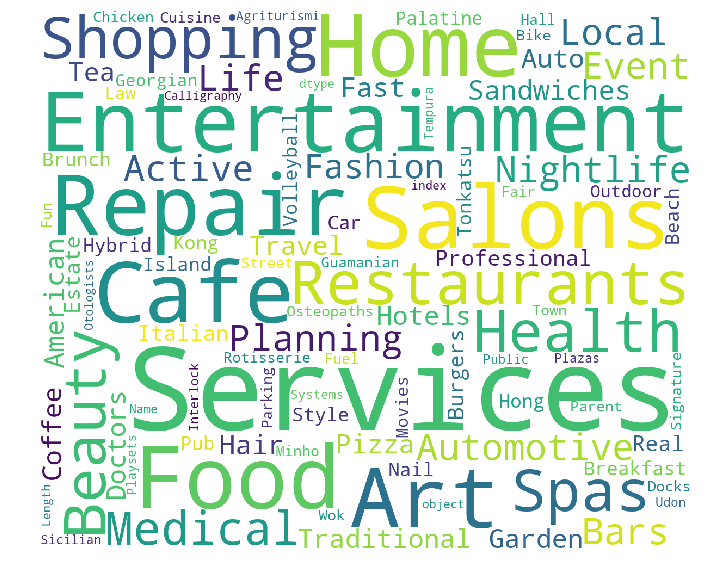

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

wordcloud = WordCloud(background_color='white',
                          width=1200,
                      stopwords = STOPWORDS,
                          height=1000
                         ).generate(str(cat_count['index']))


plt.imshow(wordcloud)
plt.axis('off');

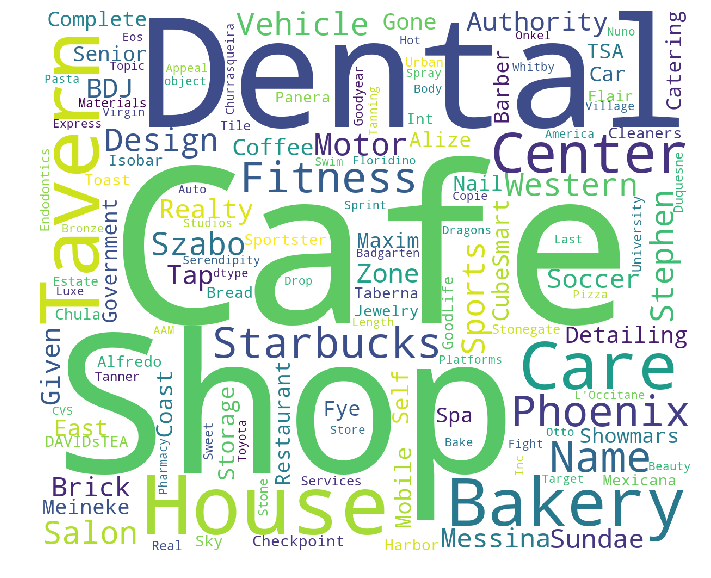

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

wordcloud = WordCloud(background_color='white',
                          width=1200,
                      stopwords = STOPWORDS,
                          height=1000
                         ).generate(str(business['name']))


plt.imshow(wordcloud)
plt.axis('off');

In [22]:
yelp_review = business.loc[:,['business_id','categories']]

In [23]:
yelp_review.nunique()

business_id    174567
categories      76419
dtype: int64

In [24]:
business_review = pd.read_csv("D:/yelp/yelp_review.csv")

In [25]:
review = business_review.loc[:,['business_id','stars','text']]

In [26]:
review.nunique()

business_id     174567
stars                5
text           5258354
dtype: int64

In [27]:
review.head()

,business_id,stars,text
0,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
1,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
2,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
3,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...
4,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...


In [28]:
new = pd.merge(review,yelp_review)

In [29]:
restaurants_review = new[new['categories'].str.contains('Restaurants')]

Text(0,0.5,'Number of reviews')

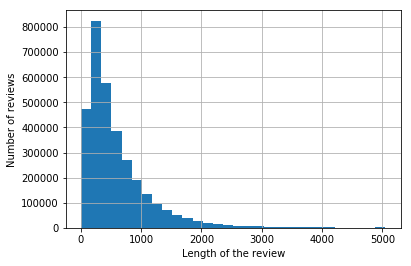

In [33]:
from matplotlib import *
restaurants_review.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')

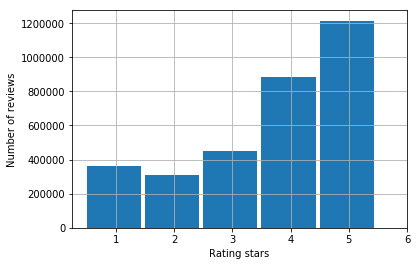

In [34]:
bins = [1, 2,3 ,4, 5, 6]
restaurants_review.stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.show()

In [35]:
restaurants_review['text length'] = restaurants_review['text'].apply(len)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


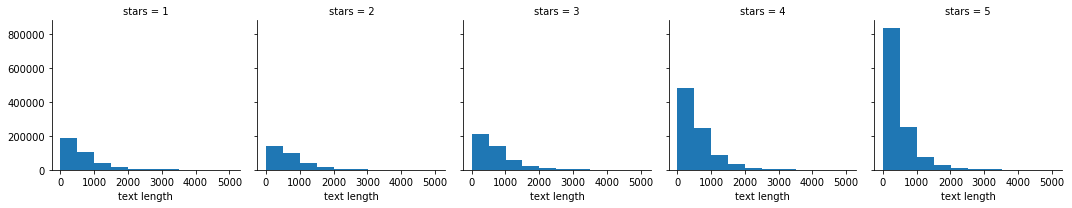

In [33]:
g = sns.FacetGrid(restaurants_review,col='stars')
g.map(plt.hist,'text length')

In [34]:
restaurants_review['stars']= restaurants_review['stars'].apply(lambda x: 1 if x > 3 else 0)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
restaurants_review.tail()

,business_id,stars,text,categories,text length
5261635,pHq_hlWqlB0QKexF7kO2mg,0,"Look, I don't have a problem with the concept....",American (Traditional);Restaurants,509
5261636,pHq_hlWqlB0QKexF7kO2mg,0,"What genius came up with this idea? Let's see,...",American (Traditional);Restaurants,1002
5261637,tZYFHe0R0Gux_2Qt7kfOvA,1,If you're looking for homecooking in the Kanna...,Soul Food;Restaurants,350
5261638,tZYFHe0R0Gux_2Qt7kfOvA,1,"Moved to the area in Nov. 2012, and pass by th...",Soul Food;Restaurants,573
5261639,tZYFHe0R0Gux_2Qt7kfOvA,0,I thought that this would kill it but... What ...,Soul Food;Restaurants,514


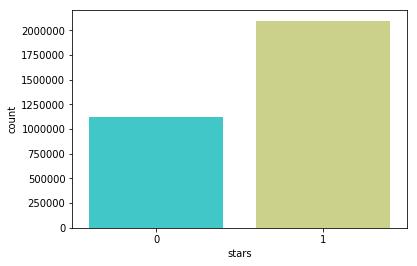

In [44]:
sns.countplot(x='stars',data=restaurants_review,palette='rainbow')

In [36]:
restaurants_review.to_csv("D:/yelp/restaurants_review.csv")

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = restaurants_review['text']
y = restaurants_review['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [43]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [44]:
predictions1 = pipeline.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[214144 123616]
 [ 22229 606437]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75    337760
           1       0.83      0.96      0.89    628666

   micro avg       0.85      0.85      0.85    966426
   macro avg       0.87      0.80      0.82    966426
weighted avg       0.86      0.85      0.84    966426



In [65]:
x= restaurants_review[restaurants_review['text length']== 990].head(1)

In [66]:
x['text']

2150    Good experience here!\n\nSome tips for future ...
Name: text, dtype: object

In [80]:
restaurants_review[restaurants_review['text length'] == 156 ]['text'].iloc[0]

"Unpleasant, dirty place. Other than that their special is nothing special, and milk shakes are too sugary. Cherry coke is OK though. Oh, and it's cash only."

In [79]:
restaurants_review[restaurants_review['stars']== 0].head()

,business_id,stars,text,categories,text length
6,AEx2SYEUJmTxVVB18LlCwA,0,This place is disgusting. The components of my...,Diners;Food;Restaurants;Delis,693
8,AEx2SYEUJmTxVVB18LlCwA,0,After hearing so many things about this famed ...,Diners;Food;Restaurants;Delis,1373
12,AEx2SYEUJmTxVVB18LlCwA,0,Nothing special besides the nostalgic look of ...,Diners;Food;Restaurants;Delis,309
17,AEx2SYEUJmTxVVB18LlCwA,0,Family owned restaurant that's been around sin...,Diners;Food;Restaurants;Delis,386
26,AEx2SYEUJmTxVVB18LlCwA,0,"Unpleasant, dirty place. Other than that their...",Diners;Food;Restaurants;Delis,156


C:\Users\patel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\patel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


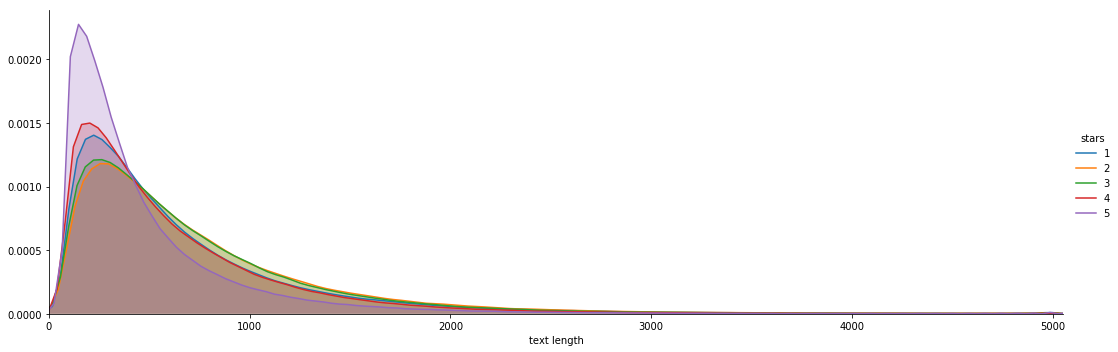

In [40]:
facet = sns.FacetGrid(restaurants_review, hue="stars",aspect=3,size=5)
facet.map(sns.kdeplot,'text length',shade= True)
facet.set(xlim=(0, restaurants_review['text length'].max()))
facet.add_legend()

C:\Users\patel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


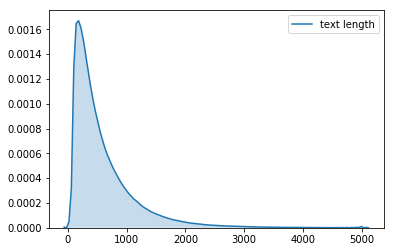

In [38]:
sns.kdeplot(restaurants_review['text length'], shade=True);

In [37]:
restaurants_review['text length'].describe()

count    3.221418e+06
mean     5.967661e+02
std      5.562692e+02
min      1.000000e+00
25%      2.320000e+02
50%      4.210000e+02
75%      7.670000e+02
max      5.052000e+03
Name: text length, dtype: float64